In [3]:
import pandas as pd

df = pd.read_csv("../data/imdb_dataset.csv")
print(df.columns)

df = df[['review', 'sentiment']].dropna()

#select only first 1000 data from dataset
df = df[:1000]
print(len(df))
df.head()

Index(['review', 'sentiment'], dtype='object')
1000


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
#resources for NLTK and spaCy
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

import spacy


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aakashshrestha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aakashshrestha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aakashshrestha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/aakashshrestha/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [5]:
#remove <br> </br> from the data
df['review'] = df['review'].str.replace(r'<br\s*/?>', '', regex=True)

In [6]:
#tokenization
import nltk
from nltk.tokenize import word_tokenize

df['tokens'] = df['review'].apply(lambda x: word_tokenize(x))
df.head(10)

,review,sentiment,tokens
0,One of the other reviewers has mentioned that ...,positive,"[One, of, the, other, reviewers, has, mentione..."
1,A wonderful little production. The filming tec...,positive,"[A, wonderful, little, production, ., The, fil..."
2,I thought this was a wonderful way to spend ti...,positive,"[I, thought, this, was, a, wonderful, way, to,..."
3,Basically there's a family where a little boy ...,negative,"[Basically, there, 's, a, family, where, a, li..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[Petter, Mattei, 's, ``, Love, in, the, Time, ..."
5,"Probably my all-time favorite movie, a story o...",positive,"[Probably, my, all-time, favorite, movie, ,, a..."
6,I sure would like to see a resurrection of a u...,positive,"[I, sure, would, like, to, see, a, resurrectio..."
7,"This show was an amazing, fresh & innovative i...",negative,"[This, show, was, an, amazing, ,, fresh, &, in..."
8,Encouraged by the positive comments about this...,negative,"[Encouraged, by, the, positive, comments, abou..."
9,If you like original gut wrenching laughter yo...,positive,"[If, you, like, original, gut, wrenching, laug..."


In [7]:
#case folding
df['tokens_lower'] = df['tokens'].apply(lambda x: [word.lower() for word in x])
df.head()

,review,sentiment,tokens,tokens_lower
0,One of the other reviewers has mentioned that ...,positive,"[One, of, the, other, reviewers, has, mentione...","[one, of, the, other, reviewers, has, mentione..."
1,A wonderful little production. The filming tec...,positive,"[A, wonderful, little, production, ., The, fil...","[a, wonderful, little, production, ., the, fil..."
2,I thought this was a wonderful way to spend ti...,positive,"[I, thought, this, was, a, wonderful, way, to,...","[i, thought, this, was, a, wonderful, way, to,..."
3,Basically there's a family where a little boy ...,negative,"[Basically, there, 's, a, family, where, a, li...","[basically, there, 's, a, family, where, a, li..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[Petter, Mattei, 's, ``, Love, in, the, Time, ...","[petter, mattei, 's, ``, love, in, the, time, ..."


In [8]:
#stop word removal
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))
print(len(stopwords))

df['tokens_nostopwords'] = df['tokens_lower'].apply(lambda x: [word for word in  x if word.isalpha() and word not in stopwords]);
df['tokens_nostopwords'].head(20)

198


0     [one, reviewers, mentioned, watching, oz, epis...
1     [wonderful, little, production, filming, techn...
2     [thought, wonderful, way, spend, time, hot, su...
3     [basically, family, little, boy, jake, thinks,...
4     [petter, mattei, love, time, money, visually, ...
5     [probably, favorite, movie, story, selflessnes...
6     [sure, would, like, see, resurrection, dated, ...
7     [show, amazing, fresh, innovative, idea, first...
8     [encouraged, positive, comments, film, looking...
9     [like, original, gut, wrenching, laughter, lik...
10    [phil, alien, one, quirky, films, humour, base...
11    [saw, movie, came, recall, scariest, scene, bi...
12    [im, big, fan, boll, work, many, enjoyed, movi...
13    [cast, played, appreciate, trying, bring, shak...
14    [fantastic, movie, three, prisoners, become, f...
15    [kind, drawn, erotic, scenes, realize, one, am...
16    [films, simply, remade, one, bad, film, fails,...
17    [movie, made, one, top, awful, movies, hor

In [9]:
#stemming

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
df['tokens_stemmed'] = df['tokens_nostopwords'].apply(lambda x: [stemmer.stem(word) for word in x])
df['tokens_stemmed'].head(10)

0    [one, review, mention, watch, oz, episod, hook...
1    [wonder, littl, product, film, techniqu, fashi...
2    [thought, wonder, way, spend, time, hot, summe...
3    [basic, famili, littl, boy, jake, think, zombi...
4    [petter, mattei, love, time, money, visual, st...
5    [probabl, favorit, movi, stori, selfless, sacr...
6    [sure, would, like, see, resurrect, date, seah...
7    [show, amaz, fresh, innov, idea, first, air, f...
8    [encourag, posit, comment, film, look, forward...
9    [like, origin, gut, wrench, laughter, like, mo...
Name: tokens_stemmed, dtype: object

In [10]:
#Lemmatization
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
df['tokens_lemmatized'] = df['tokens_nostopwords'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df.head(10)

,review,sentiment,tokens,tokens_lower,tokens_nostopwords,tokens_stemmed,tokens_lemmatized
0,One of the other reviewers has mentioned that ...,positive,"[One, of, the, other, reviewers, has, mentione...","[one, of, the, other, reviewers, has, mentione...","[one, reviewers, mentioned, watching, oz, epis...","[one, review, mention, watch, oz, episod, hook...","[one, reviewer, mentioned, watching, oz, episo..."
1,A wonderful little production. The filming tec...,positive,"[A, wonderful, little, production, ., The, fil...","[a, wonderful, little, production, ., the, fil...","[wonderful, little, production, filming, techn...","[wonder, littl, product, film, techniqu, fashi...","[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,positive,"[I, thought, this, was, a, wonderful, way, to,...","[i, thought, this, was, a, wonderful, way, to,...","[thought, wonderful, way, spend, time, hot, su...","[thought, wonder, way, spend, time, hot, summe...","[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,negative,"[Basically, there, 's, a, family, where, a, li...","[basically, there, 's, a, family, where, a, li...","[basically, family, little, boy, jake, thinks,...","[basic, famili, littl, boy, jake, think, zombi...","[basically, family, little, boy, jake, think, ..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[Petter, Mattei, 's, ``, Love, in, the, Time, ...","[petter, mattei, 's, ``, love, in, the, time, ...","[petter, mattei, love, time, money, visually, ...","[petter, mattei, love, time, money, visual, st...","[petter, mattei, love, time, money, visually, ..."
5,"Probably my all-time favorite movie, a story o...",positive,"[Probably, my, all-time, favorite, movie, ,, a...","[probably, my, all-time, favorite, movie, ,, a...","[probably, favorite, movie, story, selflessnes...","[probabl, favorit, movi, stori, selfless, sacr...","[probably, favorite, movie, story, selflessnes..."
6,I sure would like to see a resurrection of a u...,positive,"[I, sure, would, like, to, see, a, resurrectio...","[i, sure, would, like, to, see, a, resurrectio...","[sure, would, like, see, resurrection, dated, ...","[sure, would, like, see, resurrect, date, seah...","[sure, would, like, see, resurrection, dated, ..."
7,"This show was an amazing, fresh & innovative i...",negative,"[This, show, was, an, amazing, ,, fresh, &, in...","[this, show, was, an, amazing, ,, fresh, &, in...","[show, amazing, fresh, innovative, idea, first...","[show, amaz, fresh, innov, idea, first, air, f...","[show, amazing, fresh, innovative, idea, first..."
8,Encouraged by the positive comments about this...,negative,"[Encouraged, by, the, positive, comments, abou...","[encouraged, by, the, positive, comments, abou...","[encouraged, positive, comments, film, looking...","[encourag, posit, comment, film, look, forward...","[encouraged, positive, comment, film, looking,..."
9,If you like original gut wrenching laughter yo...,positive,"[If, you, like, original, gut, wrenching, laug...","[if, you, like, original, gut, wrenching, laug...","[like, original, gut, wrenching, laughter, lik...","[like, origin, gut, wrench, laughter, like, mo...","[like, original, gut, wrenching, laughter, lik..."


In [11]:
#POS tagging and shallow parsing
#POS -> Part of Speech, helps identify grammar roles like noun, verb.
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('universal_tagset')
df['pos_tags'] = df['tokens_nostopwords'].apply(lambda x: nltk.pos_tag(x, tagset='universal'));
df['pos_tags'].head()

#Shallow Parsing whahthththt

# do it

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/aakashshrestha/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/aakashshrestha/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


0    [(one, NUM), (reviewers, NOUN), (mentioned, VE...
1    [(wonderful, ADJ), (little, ADJ), (production,...
2    [(thought, VERB), (wonderful, ADJ), (way, NOUN...
3    [(basically, ADV), (family, NOUN), (little, AD...
4    [(petter, NOUN), (mattei, ADV), (love, ADJ), (...
Name: pos_tags, dtype: object

113041
['one', 'reviewers', 'mentioned', 'watching', 'oz', 'episode', 'hooked', 'right', 'exactly', 'happened']
<class 'collections.Counter'>
Counter({'movie': 1731, 'film': 1513, 'one': 969, 'like': 776, 'would': 528, 'even': 520, 'good': 519, 'see': 513, 'really': 454, 'story': 445, 'get': 414, 'time': 412, 'much': 394, 'well': 370, 'people': 358, 'first': 339, 'great': 338, 'bad': 337, 'also': 337, 'made': 336, 'way': 331, 'could': 324, 'movies': 324, 'think': 311, 'make': 293, 'plot': 286, 'many': 285, 'watch': 281, 'never': 274, 'characters': 273, 'little': 271, 'two': 266, 'best': 259, 'character': 259, 'films': 257, 'seen': 249, 'life': 247, 'know': 243, 'acting': 238, 'go': 223, 'ever': 223, 'scene': 223, 'scenes': 220, 'show': 217, 'man': 217, 'better': 209, 'back': 208, 'love': 206, 'still': 203, 'say': 196, 'end': 196, 'something': 193, 'watching': 190, 'new': 189, 'funny': 189, 'real': 184, 'find': 184, 'world': 182, 'actors': 178, 'though': 175, 'makes': 172, 'old': 170, '

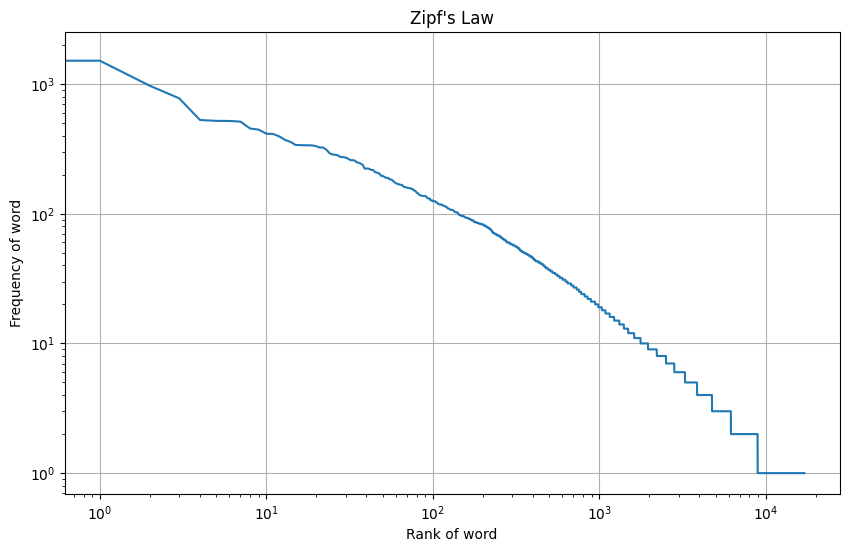

In [12]:
#Zipf's Law
from collections import Counter
import matplotlib.pyplot as plt

all_words = [word for tokens in df['tokens_nostopwords'] for word in tokens]
print(len(all_words))
print(all_words[:10])

word_freq =Counter(all_words)
print(type(word_freq))
print(word_freq)

freqs = sorted(word_freq.values(), reverse=True) #sorted in descending order
#words with higher frequency is lower rank, rank 1 -> highest fruquency...
print(freqs)

plt.figure(figsize=(10,6))
plt.loglog(freqs) #x and y axis both have logarithmic scale, large
plt.title("Zipf's Law")
plt.xlabel("Rank of word")
plt.ylabel("Frequency of word")
plt.grid(True)
plt.show()


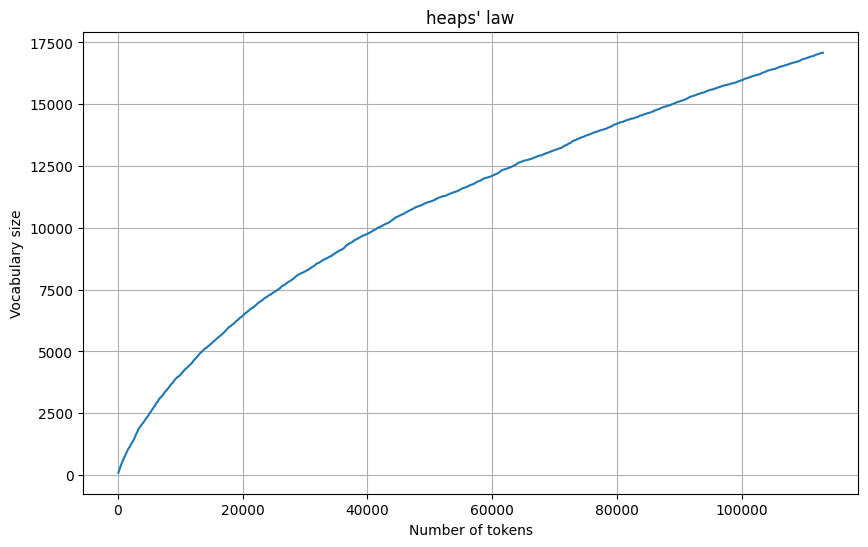

In [13]:
#Heaps Law

import numpy as np

def heaps_law(words):
    vocab = set()
    tokens = 0
    vocab_sizes = []
    token_counts = []
    
    for word in words:
        tokens += 1
        vocab.add(word)
        if tokens % 100 == 0:
            vocab_sizes.append(len(vocab))
            token_counts.append(tokens)
    return token_counts, vocab_sizes

token_count, vocab_size = heaps_law(all_words)

plt.figure(figsize=(10,6))
plt.plot(token_count, vocab_size)
plt.title("heaps' law")
plt.xlabel("Number of tokens")
plt.ylabel("Vocabulary size")
plt.grid(True)
plt.show()

In [15]:
#Term Frequency- Inverse Document Frequency
#TF-IDF
#TF-> finds the frequency of word's appearance in document or entire colleciton of document
#IDF -> determines how important a word is -> gives less importance to word that is frequent in many documents

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=100)
tfidf_matrix = tfidf.fit_transform(df['review'])
print(tfidf_matrix.toarray())


[[0.05430606 0.07157922 0.04811483 ... 0.0608508  0.13498898 0.07630606]
 [0.07703989 0.         0.13651371 ... 0.         0.06383288 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.12790844 0.08597876 ... 0.         0.04020308 0.        ]
 [0.         0.         0.         ... 0.07005783 0.10360899 0.26355465]
 [0.03061485 0.         0.10849826 ... 0.         0.25366522 0.1720691 ]]


In [17]:
#Inverted Index
#map word with document id, not the other way 

from collections import defaultdict

inverted_index = defaultdict(list) #regular dict would throw an error if no index for a word

for i, tokens in enumerate(df['tokens_nostopwords']):
    for token in set(tokens):
        inverted_index[token].append(i)
        
print(dict(list(inverted_index.items())[:10]))


{'mentioned': [0, 34, 48, 55, 114, 119, 142, 164, 173, 182, 260, 263, 362, 368, 464, 473, 518, 545, 556, 591, 672, 705, 767, 795, 851, 887, 898, 929, 972], 'oswald': [0, 173, 867], 'stares': [0, 887], 'say': [0, 2, 13, 16, 17, 21, 26, 28, 33, 35, 37, 40, 49, 59, 62, 72, 77, 89, 91, 99, 101, 110, 111, 136, 139, 142, 149, 164, 182, 183, 186, 192, 198, 204, 210, 225, 228, 235, 243, 251, 262, 263, 273, 280, 282, 287, 288, 297, 308, 314, 316, 322, 327, 339, 340, 346, 353, 354, 361, 362, 363, 366, 391, 395, 400, 405, 406, 409, 411, 419, 427, 428, 429, 435, 449, 453, 454, 475, 496, 499, 511, 513, 514, 516, 523, 526, 542, 543, 553, 560, 561, 563, 577, 599, 624, 630, 634, 637, 638, 641, 647, 651, 655, 657, 658, 664, 672, 673, 674, 676, 678, 685, 694, 695, 699, 702, 706, 713, 719, 720, 721, 734, 741, 744, 753, 754, 757, 763, 780, 784, 786, 790, 795, 802, 804, 809, 813, 824, 825, 829, 830, 836, 848, 857, 858, 865, 870, 875, 898, 902, 907, 911, 920, 925, 931, 948, 960, 971, 975, 982, 992, 993], 'p